
## REAL ESTATE - Price Predictor


In [1]:
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/shivambector/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/shivambector/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/shivambector/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/shivambector/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/shivambector/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/shivambector/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/shivambector/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/shivambector/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in la

AttributeError: _ARRAY_API not found

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    476
1     35
Name: count, dtype: int64

In [6]:
%matplotlib inline


In [7]:
# For histograms
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

In [8]:
import numpy as np

## Test-Train Splitting

In [9]:
# For learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set , test_set = split_train_test(housing , 0.2)

In [11]:
#print(len(train_set))

In [12]:
#print(len(test_set))

In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size = 0.2, random_state=42)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    380
1     28
Name: count, dtype: int64

In [16]:
strat_test_set['CHAS'].value_counts()

CHAS
0    96
1     7
Name: count, dtype: int64

## Looking for correlations

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.667695
ZN         0.339767
B          0.317941
DIS        0.233469
CHAS       0.164782
AGE       -0.368203
RAD       -0.379016
CRIM      -0.380072
NOX       -0.411486
PTRATIO   -0.447464
TAX       -0.459274
INDUS     -0.463269
LSTAT     -0.562960
Name: MEDV, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix

<Axes: xlabel='RM', ylabel='MEDV'>

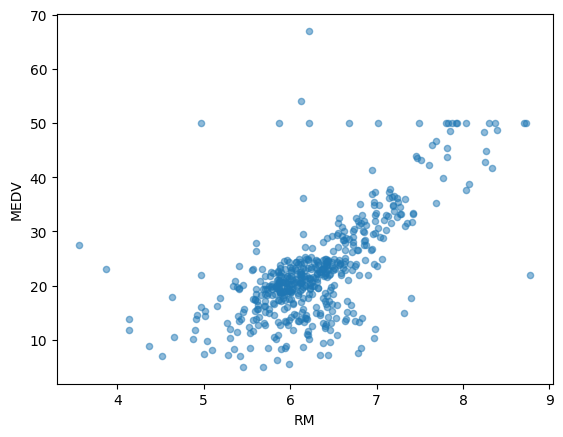

In [20]:
housing.plot(kind = "scatter", x= "RM",y = "MEDV", alpha=0.5)

## Creating a pipeline

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline(
[
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
    
])

In [23]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [24]:
housing_num = my_pipeline.fit_transform(housing)

In [25]:
housing_num

array([[-0.42152521, -0.48685178, -0.24673925, ...,  0.3268577 ,
         0.41580739,  0.64788652],
       [-0.43776099,  3.14285176, -1.1325159 , ..., -0.98103103,
         0.41161669, -0.87937274],
       [ 0.12176277, -0.48685178,  0.9845635 , ...,  0.79396081,
         0.01150978, -0.80321747],
       ...,
       [-0.29076014, -0.48685178, -0.47367376, ...,  1.1676433 ,
         0.45362844,  0.80296634],
       [ 0.27917289, -0.48685178,  0.9845635 , ...,  0.79396081,
         0.45362844, -0.30197735],
       [ 0.14615368, -0.48685178,  0.9845635 , ...,  0.79396081,
        -3.17111595,  0.7212725 ]])

## Selectiong a desired model 

In [26]:
housing_num.shape

(408, 13)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing_num,housing_labels)

RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68


In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([21.666, 22.123, 26.978, 30.578, 20.388])

In [48]:
some_labels = housing_labels.iloc[:5]

In [49]:
some_labels

495    23.1
254    21.9
365    27.5
193    31.1
35     18.9
Name: MEDV, dtype: float64

## Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(lin_mse)

In [51]:
mse

np.float64(2.296785499999997)

In [52]:
# The LinearRegressor model gives a high error so we discard this model and apply another by just importing and passing it through
# already existing pipeline.

In [53]:
# 0 mse means it leads to overfitting. 

## Using Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)  


In [55]:
rmse_scores

array([3.28644949, 3.54954579, 4.71560456, 4.40593776, 2.95590861,
       2.28234558, 6.99243776, 2.95022791, 3.33502295, 3.52662987])

## Testing Model 

In [58]:
X_test = strat_test_set.drop('MEDV', axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

np.float64(4.82687977970935)